## Section 1: Data Preprocessing

Kaggle Dataset Link: [Bank Customer Dataset](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers/code)

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Upload and load the dataset

In [2]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analyze the dataset

In [4]:
#Display the number of rows and columns
df.shape

print("Row Count for the dataset: " + format(df.shape[0]))
print("Column Count for the dataset: " + format(df.shape[1]))

Row Count for the dataset: 10000
Column Count for the dataset: 14


In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Select caterogical columns from the datset
df.select_dtypes(include = 'object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
df.select_dtypes(include = ['float64', 'int64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
print(f"Count of columns with categorical datatype : ", len(df.select_dtypes(include = 'object').columns))
print(f"Count of columns with numerical datatype : ", len(df.select_dtypes(include = ['float64', 'int64']).columns))

Count of columns with categorical datatype :  3
Count of columns with numerical datatype :  11


In [9]:
#Statistical Summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Dealing with missing values

In [11]:
#False means this dataset has no missing values
df.isnull().values.any()

False

In [12]:
df.isnull().values.sum()

0

### Dealing with categorical data

In [13]:
df.select_dtypes(include = 'object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
#These 3 columns have no effect on the Exited col
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Group the categorical columns
df.groupby('Geography').mean()

<ipython-input-18-b7aa03971d78>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [19]:
df.groupby('Gender').mean()

<ipython-input-19-1bea18cda63a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [20]:
#One Hot Encoding
df = pd.get_dummies(data = df, drop_first = True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Countplot

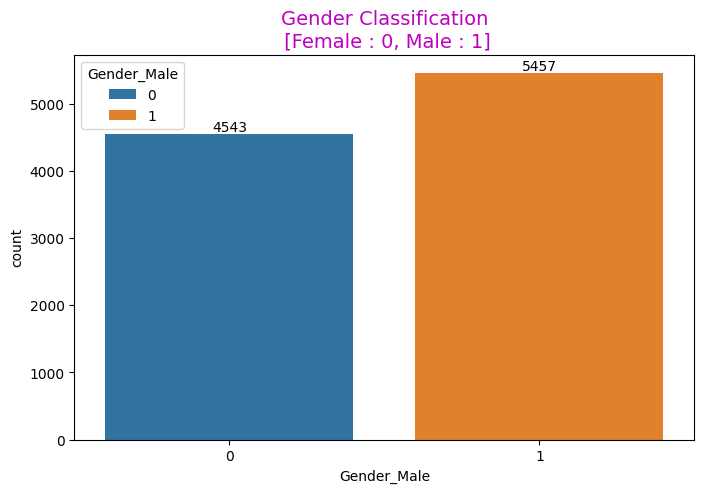

In [22]:
plt.figure(figsize = (8,5))
plt.title("Gender Classification\n [Female : 0, Male : 1]", font = 'sans serif', fontsize = 14, color = 'm')
ax = sns.countplot(x = df['Gender_Male'], hue = df['Gender_Male'])
for label in ax.containers:
  ax.bar_label(label)
plt.show()

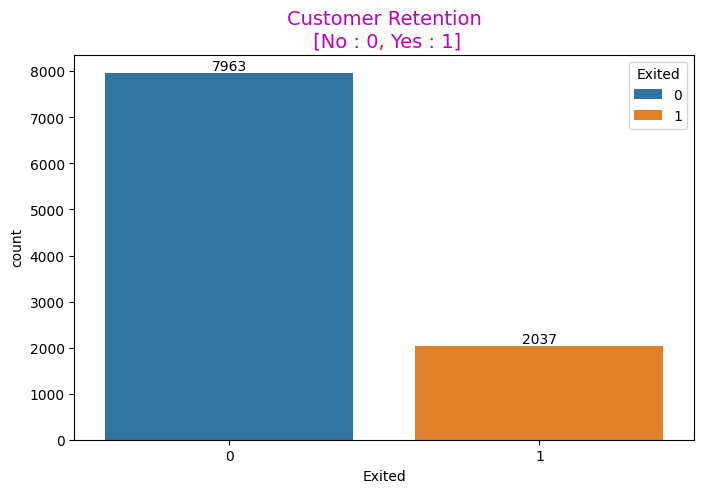

In [23]:
plt.figure(figsize = (8,5))
plt.title("Customer Retention\n [No : 0, Yes : 1]", font = 'sans serif', fontsize = 14, color = 'm')
ax = sns.countplot(x = df['Exited'], hue = df['Exited'])
for label in ax.containers:
  ax.bar_label(label)
plt.show()

In [24]:
#No of customers staying with the bank
(df.Exited == 0).sum()

7963

In [25]:
#No of customers exiting the bank
(df.Exited == 1).sum()

2037

### Correlation matrix and Heatmap

In [26]:
#Drop the dependent variable
newdf = df.drop(columns = 'Exited')

In [27]:
newdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


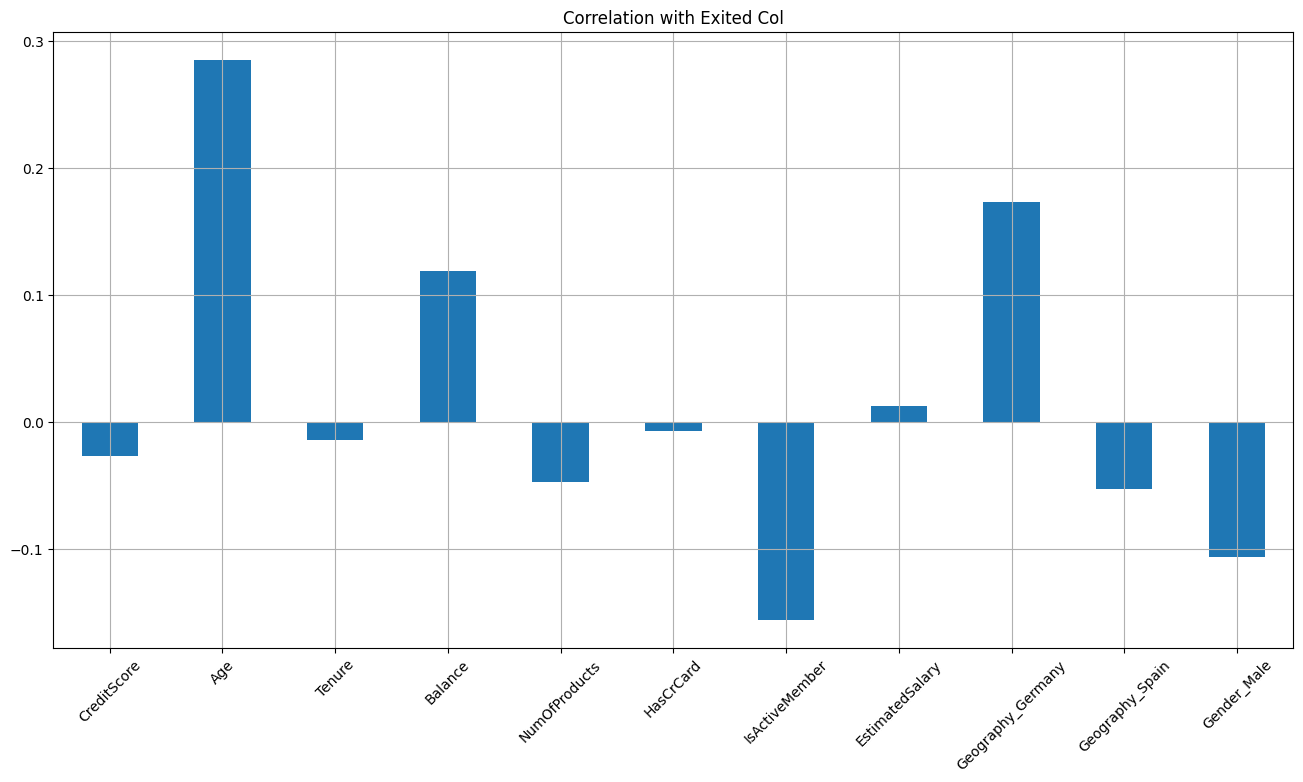

In [28]:
newdf.corrwith( df['Exited']).plot.bar(
              figsize = (16,8), title = "Correlation with Exited Col", rot =45, grid = True
)
plt.show()

In [29]:
corr = newdf.corr()

In [30]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.010297,-0.006482,-0.008112
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,1.000000,-0.332084,-0.024628
Geography_Spain,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.332084,1.000000,0.016889


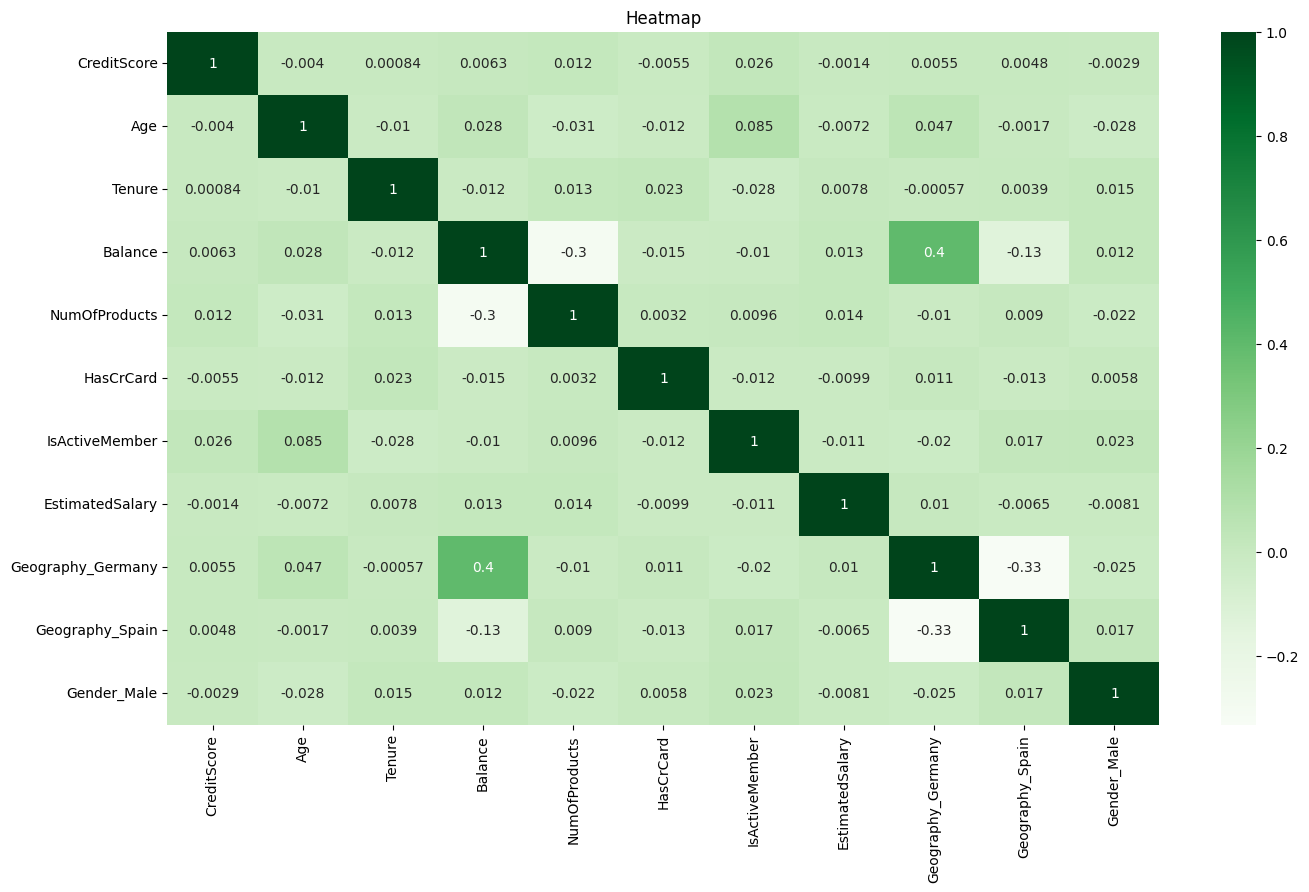

In [31]:
plt.figure(figsize = (16,9))
plt.title("Heatmap")
sns.heatmap(data = newdf.corr(), cmap = 'Greens', annot = True)
plt.show()

### Splitting the data into train and test sets

In [32]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [33]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [34]:
#Matrix of features/independent variables
x = df.drop(columns = 'Exited')
x.shape

(10000, 11)

In [35]:
#Target variable/dependent variable
y = df['Exited']
y.shape

(10000,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [37]:
x_train.shape

(8000, 11)

In [38]:
x_test.shape

(2000, 11)

In [39]:
y_train.shape

(8000,)

In [40]:
y_test.shape

(2000,)

### Feature Scaling

In [41]:
sc = StandardScaler()

In [42]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [43]:
scaled_x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [44]:
scaled_x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Section 2: Model Building

### 1) Logistic Regression


In [45]:
lr_classifier = LogisticRegression(random_state=0)

In [46]:
lr_classifier.fit(scaled_x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred = lr_classifier.predict(scaled_x_test)

In [48]:
acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [49]:
results = pd.DataFrame( [['Logistic Regression', acc, f1, prec, rec]],
 columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)

In [50]:
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [51]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

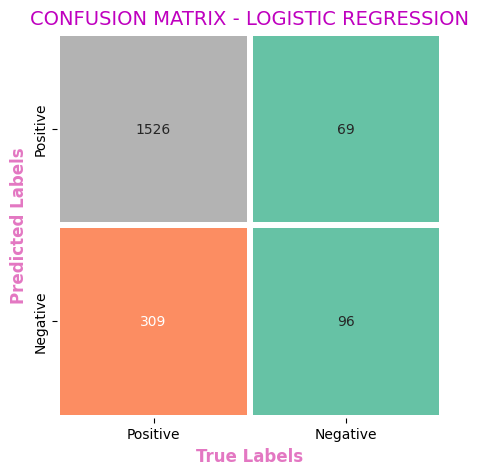

In [52]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - LOGISTIC REGRESSION", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [53]:
acc_val = cross_val_score(estimator= lr_classifier, X = scaled_x_train, y = y_train, cv= 10)
print("Accuracy is {:.2f}%".format(acc_val.mean()*100))
print("Standard Deviation is {:.2f}%".format(acc_val.std()*100))

Accuracy is 80.84%
Standard Deviation is 0.88%


### 2) Random Forest Algorithm

In [54]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(scaled_x_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_pred = rf_classifier.predict(scaled_x_test)

acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [56]:
model_results = pd.DataFrame([['Random Forest Algorithm', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)
results = pd.concat([results,model_results], ignore_index = True)
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest Algorithm,0.867,0.613372,0.745583,0.520988


In [57]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


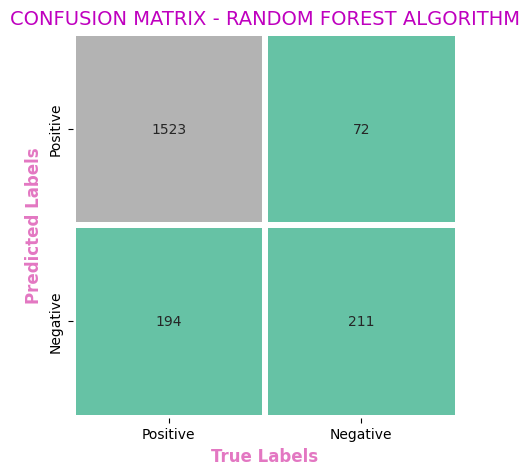

In [58]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - RANDOM FOREST ALGORITHM", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [59]:
acc_val = cross_val_score(estimator= rf_classifier, X = scaled_x_train, y = y_train, cv= 10)
print("Accuracy is {:.2f}%".format(acc_val.mean()*100))
print("Standard Deviation is {:.2f}%".format(acc_val.std()*100))

Accuracy is 85.96%
Standard Deviation is 1.02%


### 3) XGBoost

In [60]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(scaled_x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred = xgb_classifier.predict(scaled_x_test)

acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [62]:
xgb_results = pd.DataFrame([['XGBoost Classifier', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)
results = pd.concat([results,xgb_results], ignore_index = True)
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest Algorithm,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classifier,0.8525,0.594223,0.670807,0.533333


In [63]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1489  106]
 [ 189  216]]


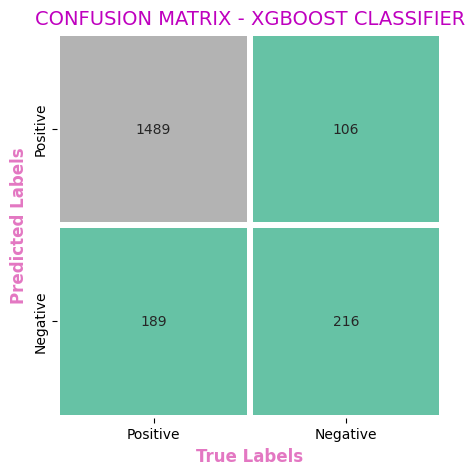

In [64]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - XGBOOST CLASSIFIER", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [65]:
acc_val = cross_val_score(estimator= xgb_classifier, X = scaled_x_train, y = y_train, cv= 10)
print("Accuracy is {:.2f}%".format(acc_val.mean()*100))
print("Standard Deviation is {:.2f}%".format(acc_val.std()*100))

Accuracy is 85.12%
Standard Deviation is 1.00%


## Section 3: Randomized Search to find the best parameters (XGBoost Classifier)

In [66]:
parameters = { 'n_estimators' : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 2, 4],
               'max_features' : ['auto', 'sqrt'],
               'bootstrap' : [True, False]
}

In [67]:
parameters

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [68]:
randomized_search = RandomizedSearchCV(estimator = rf_classifier, param_distributions = parameters, cv = 5, n_iter = 50,
                               verbose = 2, random_state = 0, n_jobs = -1)

In [69]:
randomized_search.fit(scaled_x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [70]:
randomized_search.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_split=10, n_estimators=2000,
                       random_state=0)

In [71]:
randomized_search.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [72]:
randomized_search.best_score_

0.865625

## Section 4: Final Model: Random Forest Algorithm

In [75]:
classifier = RandomForestClassifier(max_depth=80, min_samples_split=10, n_estimators=2000,
                       random_state=0)
classifier.fit(scaled_x_train, y_train)

y_pred = classifier.predict(scaled_x_test)

acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

final_results = pd.DataFrame([['Final Random Forest Algorithm', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)
results = pd.concat([results,final_results], ignore_index = True)
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest Algorithm,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classifier,0.8525,0.594223,0.670807,0.533333
3,Final Random Forest Algorithm,0.8670,0.611111,0.749104,0.516049


In [76]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1525   70]
 [ 196  209]]


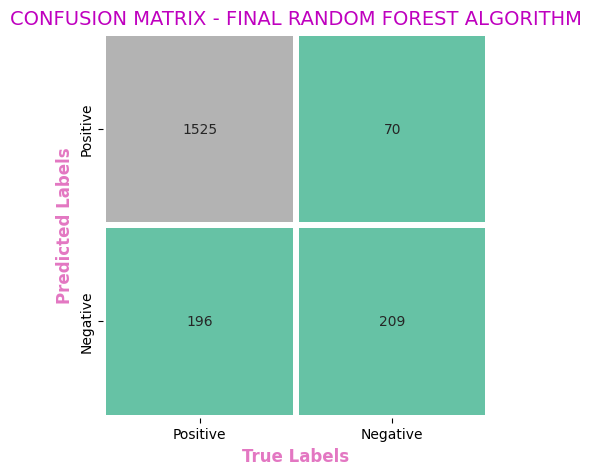

In [77]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - FINAL RANDOM FOREST ALGORITHM", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [78]:
finalacc = cross_val_score(estimator= classifier, X = scaled_x_train, y = y_train, cv= 10)
print("Accuracy is {:.2f}%".format(finalacc.mean()*100))
print("Standard Deviation is {:.2f}%".format(finalacc.std()*100))

Accuracy is 86.59%
Standard Deviation is 0.97%


## Section 5: Predicting a single observation

In [79]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [80]:
#Random observations entered to predict final model output
single_obs = [[625, 50, 5, 125000.00, 1, 0, 1, 2500000.00, 0, 0, 1]]

In [81]:
single_obs

[[625, 50, 5, 125000.0, 1, 0, 1, 2500000.0, 0, 0, 1]]

In [82]:
#The final model predicts that the customer will continue with the bank
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])